In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
col_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset = pd.read_csv("housing (task4).csv",delim_whitespace=True, names=col_names)
dataset.dropna()
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [40]:
X=dataset.drop(['MEDV'],axis=1)
y=dataset['MEDV']

In [41]:
from numpy import set_printoptions
scalar = StandardScaler().fit(X)
rX = scalar.transform(X)
set_printoptions(precision=3)
print(rX[0:1, :])

[[-0.42   0.285 -1.288 -0.273 -0.144  0.414 -0.12   0.14  -0.983 -0.667
  -1.459  0.441 -1.076]]


c:\python27\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
X_train, X_val, y_train, y_val = train_test_split(rX, y,test_size=0.2, random_state=3)

In [43]:
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=3, random_state=1, shuffle=True)
    cv_score = cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_score)
    names.append(name)
    scores = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(scores)

 LR : 0.707605 (0.028222)
 LASSO : 0.643030 (0.036345)
 EN : 0.621162 (0.028702)
 KNN : 0.720931 (0.085252)
 CART : 0.625640 (0.102679)
 SVR : 0.576980 (0.062160)


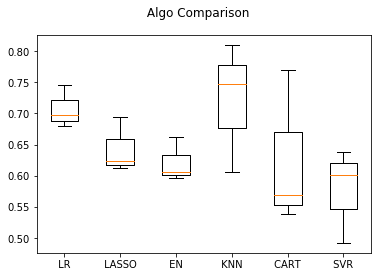

In [44]:
fig = plt.figure()
fig.suptitle(' Algo Comparison ')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)

predictions = model.predict(X_val)
print(r2_score(y_val, predictions))

0.801596729832484


In [47]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=3, n_estimators=100)
model.fit(X_scaled, y_train)
# transform the validation dataset
X_scaled_val = scaler.transform(X_val)
predictions = model.predict(X_scaled_val)
print(r2_score(y_val, predictions))

0.9299685711734846
